1. Plot the loss and accuracy for both training data and validation data using the history object in the source code.

In [ ]:
from keras import Sequential 
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() #loading data

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(train_images.shape[1:]) #looking at the shape 

(28, 28)


In [ ]:
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

784


In [ ]:
#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /= 255.0
test_data /= 255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))


Epoch 1/10
235/235 [==============================] - 8s 29ms/step - loss: 0.4835 - accuracy: 0.8440 - val_loss: 0.1152 - val_accuracy: 0.9643
Epoch 2/10
235/235 [==============================] - 6s 27ms/step - loss: 0.1024 - accuracy: 0.9690 - val_loss: 0.0959 - val_accuracy: 0.9707
Epoch 3/10
235/235 [==============================] - 6s 27ms/step - loss: 0.0590 - accuracy: 0.9811 - val_loss: 0.0975 - val_accuracy: 0.9739
Epoch 4/10
235/235 [==============================] - 6s 27ms/step - loss: 0.0392 - accuracy: 0.9881 - val_loss: 0.0649 - val_accuracy: 0.9813
Epoch 5/10
235/235 [==============================] - 6s 27ms/step - loss: 0.0256 - accuracy: 0.9918 - val_loss: 0.0751 - val_accuracy: 0.9788
Epoch 6/10
235/235 [==============================] - 6s 27ms/step - loss: 0.0203 - accuracy: 0.9932 - val_loss: 0.0770 - val_accuracy: 0.9814
Epoch 7/10
235/235 [==============================] - 6s 27ms/step - loss: 0.0151 - accuracy: 0.9955 - val_loss: 0.1054 - val_accuracy: 0.9772

In [ ]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data: Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.0947 - accuracy: 0.9836
Evaluation result on Test Data: Loss = 0.09473913908004761, accuracy = 0.9836000204086304


In [ ]:
def get_plot(history): #plot function 
#accuracy graph
  plt.plot(history.history['accuracy']) 
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

#loss and valdation loss graph
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

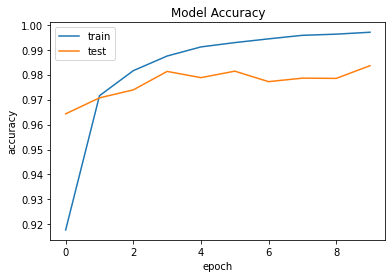

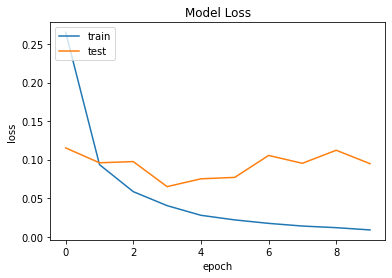

In [ ]:
get_plot(history)

2. Plot one of the images in the test data, and then do inferencing to check what is the prediction of the model on that single image.

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


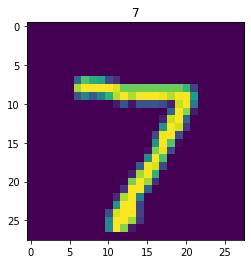

In [ ]:
get_class = model.predict_classes(test_data[0].reshape(1,784))
plt.title(get_class[0])
plt.imshow(test_data[0].reshape(28,28))